In [15]:
import os
import random
import tarfile

import numpy as np
from six.moves import urllib

In [16]:
PROJECT_ROOT = os.getcwd() 
HOUSING_PATH = os.path.join(PROJECT_ROOT, "data", "housing")
HOUSING_CSV = os.path.join(PROJECT_ROOT, "housing.csv")

In [17]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [18]:
housing = load_housing_data()
housing.head()

,Location,Price,Price per m2,Size M2,Rooms
0,"Warszawa, Praga-Północ",396 000 zł,13 655 zł/m²,29 m²,2 pokoje
1,"Warszawa, Bemowo, ul. Secemińska",695 000 zł,11 564 zł/m²,60.1 m²,3 pokoje
2,"Warszawa, Wilanów",828 000 zł,15 055 zł/m²,55 m²,2 pokoje
3,"Warszawa, Białołęka",730 000 zł,13 225 zł/m²,55.2 m²,3 pokoje
4,"Warszawa, Śródmieście, ul. Marszałkowska 111a",750 000 zł,19 330 zł/m²,38.8 m²,2 pokoje


In [20]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Location      11250 non-null  object
 1   Price         11250 non-null  object
 2   Price per m2  11250 non-null  object
 3   Size M2       11250 non-null  object
 4   Rooms         11250 non-null  object
dtypes: object(5)
memory usage: 439.6+ KB


In [22]:
housing['Location'].value_counts()

Location
Warszawa, Mokotów                                       301
Warszawa, Śródmieście                                   253
Warszawa, Wola                                          212
Warszawa, Praga-Południe                                181
Warszawa, Ursynów                                       165
                                                       ... 
Warszawa, Śródmieście, Natolińska                         1
Warszawa, Włochy, Potrzebna                               1
Warszawa, Wola, Moczydło, Monte Cassino                   1
Warszawa, Śródmieście, Nowe Miasto, ul. Świętojerska      1
Warszawa, Śródmieście, Traugutta                          1
Name: count, Length: 3906, dtype: int64

In [23]:
housing.describe()

,Location,Price,Price per m2,Size M2,Rooms
count,11250,11250,11250,11250,11250
unique,3906,1890,5783,2810,10
top,"Warszawa, Mokotów",599 000 zł,10 000 zł/m²,48 m²,2 pokoje
freq,301,178,67,211,4365


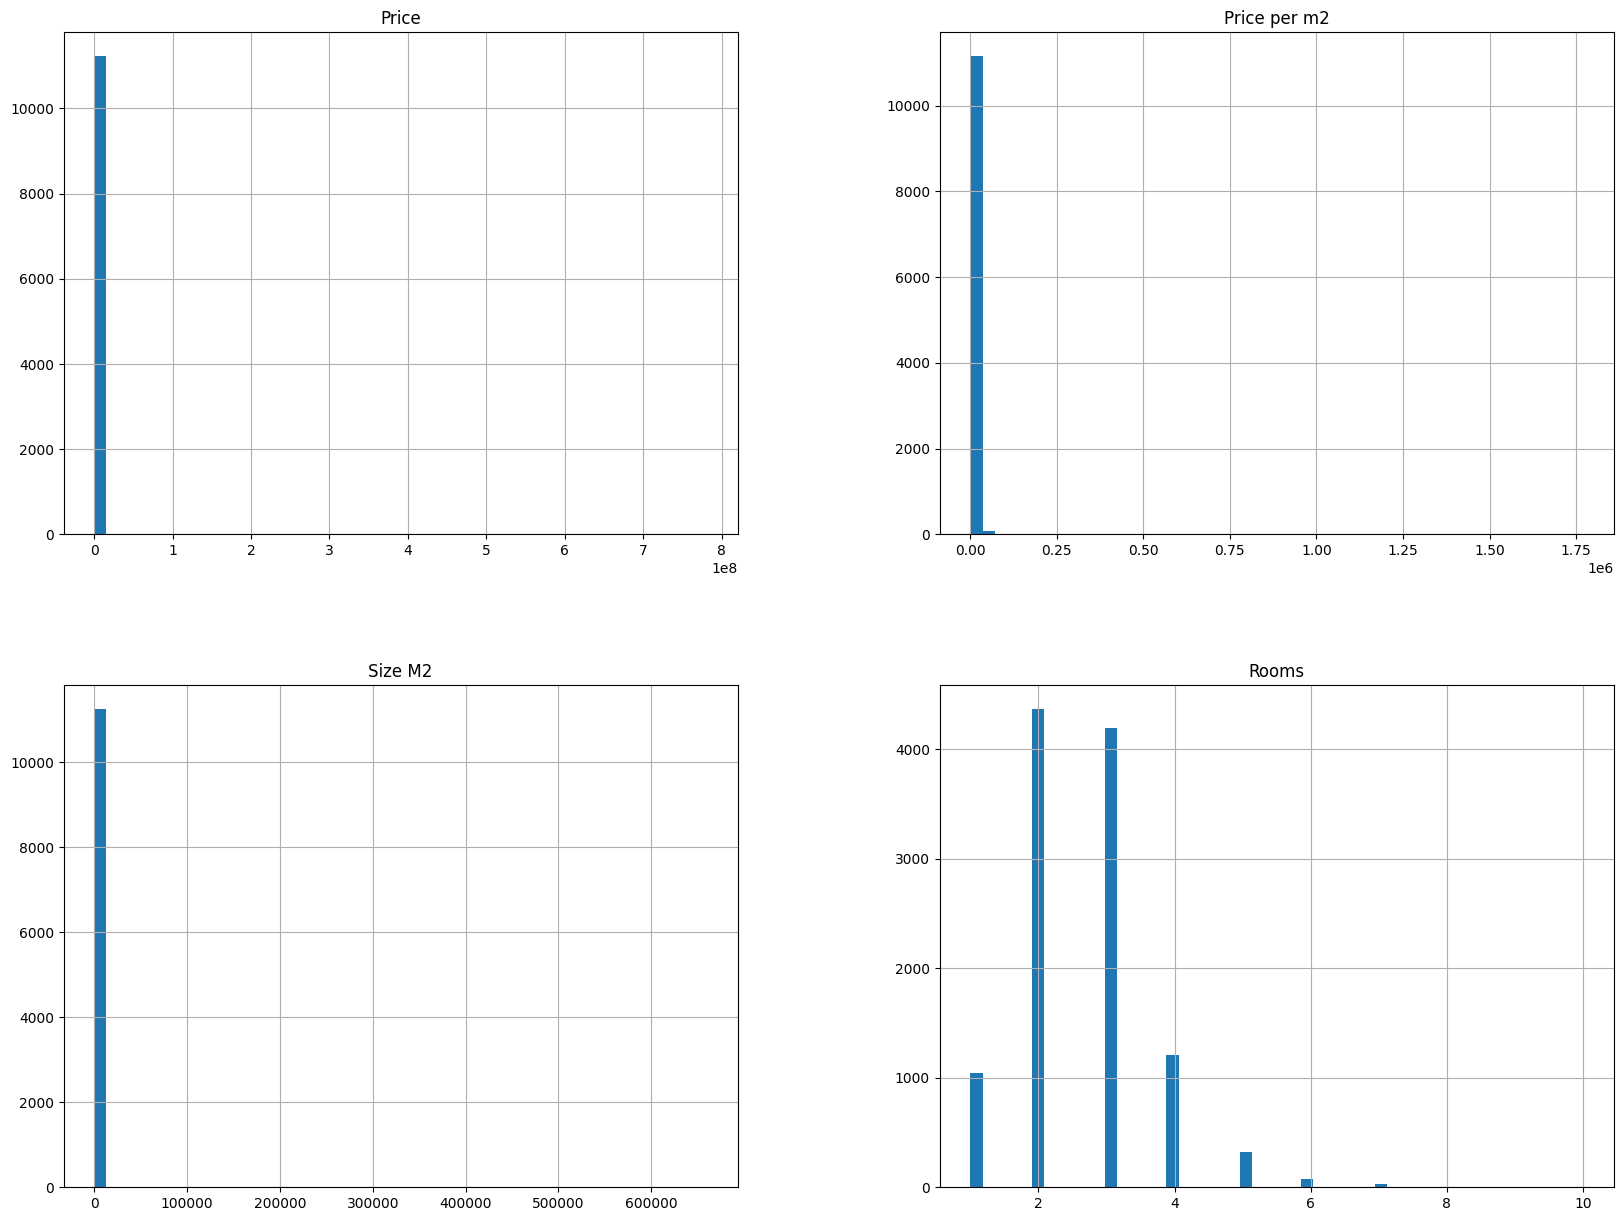

In [28]:
import matplotlib_inline
import matplotlib.pyplot as plt
housing["Price"] = housing["Price"].astype(str)

# Remove spaces, currency symbols (€ and zł), and commas
housing["Price"] = (
    housing["Price"]
    .str.replace(r"[^\d.]", "", regex=True)
    .astype(float)  # Convert to float
)

# Fix 'Price per m2'
housing["Price per m2"] = (
    housing["Price per m2"]
    .astype(str)
    .str.replace(r"[^\d.]", "", regex=True)
    .astype(float)
)

# Fix 'Size M2'
housing["Size M2"] = (
    housing["Size M2"]
    .astype(str)
    .str.replace(r"[^\d.]", "", regex=True)
    .astype(float)
)

# Fix 'Rooms' (extract only numbers)
housing["Rooms"] = (
    housing["Rooms"]
    .astype(str)
    .str.extract(r"(\d+)") 
    .astype(float)
)

housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [30]:
import numpy as np

def split_train_test(data, test_ratio):
    random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print("Learning: ", len(train_set), "Training: ", len(train_set), "Testing: ", len(test_set))

Learning:  9000 Training:  9000 Testing:  2250


In [31]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_col, hash=hashlib.md5):
    ids = data[id_col]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

print("Learning: ", len(train_set), "Training: ", len(train_set), "Testing: ", len(test_set))

Learning:  8977 Training:  8977 Testing:  2273
